<p>Ben Trey<br>
Project 1<br>
Data Science Track<br>
2019/7/18<br>
</p>

<h1>Defining the Utility Function</h1>
<p>Let $p_i$ be the measured probability of getting a problem correct and $P_m$ be a reward function defined as $P=\sqrt{\frac{1}{K}\sum_{k=1}^K t_k \cdot  w_k\cdot\left(1-p_k\right)^2}$, where $w_i$ is a weight depending on the student's strength on a topic, $t_i$ is a boolean variable representing a correct answer, and $K$ is the number of problems a students homework set. $p_i$ comes from the set of all possible problems for a particular homework and $P$ depends only on the problems coming from the homework belonging to one student.</p>
<h1>Goal of this Analysis</h1>
<p>The goal of this visualization is to determine if this utility function is a good measure of the growth of a student. </p>


In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import sys
from tqdm import tqdm_notebook as tqdm

In [49]:
directory='/mnt/c/users/我的电脑/desktop/springboard/capstone'

#This class will simulate a students performance 
class Student:
    def __init__(self, school_quality, email):
        #ability represents a student's baseline math skills
        #intelligence represents a student's potential for growth
        #motivation represents a student's motivation for growth 
        #consistency represents a student's consistency in performance
        self.email = email
        self.ability = school_quality - 1.0 + 2.0*np.random.random()
        self.intelligence = school_quality - 1.0 + 2.0*np.random.random()
        self.motivation = school_quality - 1.0 + 2.0*np.random.random()
        self.consistency = school_quality - 1.0 + 2.0*np.random.random()
        self.topics={}
        self.C_list=[1.0,1.0,1.0]
        
    #problemUpdate updates the student's math ability after a correct problem    
    def problem_update(self, correct, topic, old_topic, difficulty):
        if not topic in self.topics.keys():
            self.topics[topic]=-1.0+2.0*np.random.random()
        if not old_topic in self.topics.keys():
            self.topics[old_topic]=-1.0+2.0*np.random.random()
        if correct:
            #increase intelligence with a certain probability
            #increase consistency with a certain probability
            #increase motivation with a certain probability
            if np.exp(self.ability) / (1+np.exp(self.ability)) > np.random.random():
                self.ability = self.ability + difficulty/100.0
            if np.exp(self.intelligence) / (1+np.exp(self.intelligence)) > np.random.random():
                self.intelligence = self.intelligence + difficulty/1000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) > np.random.random():
                self.consistency = self.consistency + difficulty/1000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) > np.random.random():
                self.motivation = self.motivation + difficulty/100.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) >np.random.random():
                self.topics[topic] = self.topics[topic]+difficulty/100.0
            if np.exp(self.topics[old_topic])/(1+np.exp(self.topics[old_topic])) >np.random.random():
                self.topics[old_topic] = self.topics[old_topic]+difficulty/100.0
        else:
            #decrease ability with a certain probability
            #decrease intelligence with a certain probability
            #decrease consistency with a certain probability
            #decrease motivation with a certain probability
            if np.exp(self.ability)/(1+np.exp(self.ability)) < np.random.random():
                self.math_ability = self.ability - difficulty/ 100.0
            if np.exp(self.intelligence)/(1+np.exp(self.intelligence)) < np.random.random():
                self.intelligence = self.intelligence - difficulty/1000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) < np.random.random():
                self.consistency = self.consistency - difficulty/1000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) < np.random.random():
                self.motivation = self.motivation - difficulty/100.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) < np.random.random():
                self.topics[topic] = self.topics[topic] - difficulty/100.0
            if np.exp(self.topics[old_topic])/(1+np.exp(self.topics[old_topic])) < np.random.random():
                self.topics[old_topic] = self.topics[old_topic] - difficulty/100.0
        
class School:
    def __init__(self,name):
        self.name = name
        self.school_quality=np.random.random()
        self.students = {}

class Homework:
    def __init__(self,number):
        self.number = number
        self.problem_set = []
        self.topics = set()
        
class Problem:
    def __init__(self, topic, old_topic, discipline, difficulty):
        self.topic = topic
        self.old_topic = old_topic
        self.discipline = discipline
        self.difficulty = difficulty

class Student_Profile:
    def __init__(self, real_name, user_name, password, email, school):
        self.real_name = real_name
        self.user_name = user_name
        self.password = password
        self.email = email
        self.school = school 

class Homework_Holder:
    def __init__(self):
        self.homeworks={}

def user_name_creator():
    pre=['dank', 'snarky', 'lunar', 'fiesty', 'fruity', 'spicy', 'spikey', 'slippery', 'sleepy', \
        'spooky', 'blinking', 'burping', 'sugary', 'dark', 'dinky', 'droopy', 'blind', 'hairy', \
        'hip', 'lame', 'fiery']
    fix=['tiger', 'shark', 'wheels', 'nightmare', 'guitar', 'pants', 'cat', 'blinker', 'bum', \
        'bacon', 'stinker', 'stripe', 'horse', 'monkey', 'popeye', 'eyes', 'moves', 'figher', \
        'liner', 'drifter', 'docker']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000))

def password_creator():
    chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890!@#$%^&*'
    password = ''
    while len(password) < 10:
        password += chars[np.random.randint(0,len(chars)-1)]
    return password

def real_name_creator():
    first = ['Abe', 'Michael', 'Blanche', 'Bobby', 'Johnny', 'Ryan', 'Jasmine', 'Sarah', 'Jenny', \
        'Josey', 'Eva', 'Wendy', 'Kelly', 'Wayne', 'Larry', 'Cindy', 'Sunny', 'Yolanda', 'Coco', \
        'Helen', 'Barette', 'Judy', 'Teddy', 'Frank', 'Victor', 'Yvonne', 'Howard', 'Richard', \
        'Angel', 'Harry', 'Sammy', 'Alex', 'Albert', 'David', 'Lester', 'Maddy', 'Patrick', \
        'Holly', 'Dan', 'Matt', 'Violet', 'Skylar', 'Patricia', 'Oscar', 'Edgar', 'Owen', 'Eric', \
        'Grace', 'Amy', 'Otto', 'Gunther', 'Franz', 'Lina', 'Nora','Angela', 'Olivia','Oliver']
    last = ['Zhang', 'Zhu', 'Ma', 'Xu', 'Wang', 'Liu', 'Li', 'Lin', 'Smith', 'Jones', 'Jackson', \
        'James', 'Johnson', 'Oneal', 'Riley', 'Maxwell', 'Baker', 'Lenz', 'Goldstein', 'Feldman', \
        'Rothschild', 'Kruger', 'Lowenstein', 'Young', 'Parker', 'Morgan', 'Barker', 'Dunn', \
        'Bradley' 'Woods', 'Jordan', 'McGrady', 'Austin', 'Hogan', 'McGuiness', 'Park']
    return np.random.choice(first) + ' ' + np.random.choice(last)

def email_creator():
    pre = ['dirty', 'milky', 'fishy', 'slimy', 'used', 'old', 'tired', 'slightly', 'mostly', \
        'found', 'lost', 'new', 'freshy', 'daily', 'buried', 'acient', 'retired', 'deep', 'moist', \
        'dry', 'hot', 'cold', 'folding', 'extra', 'replacement', 'clamy', 'soiled']
    fix = ['bread', 'beans', 'bike', 'tire', 'blanket', 'rug', 'window', 'chrysler', 'jeep', \
        'sub', 'drum', 'snake', 'shoes', 'shirt', 'hat', 'jug', 'shack', 'tide', 'spice', 'cola', \
        'cup', 'skates']
    provider = ['yahoo.com', 'gmail.com', 'outlook.com', 'qq.com', '163.com']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000)) + '@' \
        + np.random.choice(provider)

def get_data(student,homework_holder,probabilities,homework_data):
    email=student.email
    homework_number=len(homework_holder.homeworks.keys())-1
    p_data=[]
    P_data=[]
    for homework_cursor in range(homework_number):
        homework_probabilities=probabilities[probabilities['name']=='HW'+str(homework_cursor+1)]
        homework_data_frame=homework_holder.homeworks['HW'+str(homework_cursor+1)]
        user_data_frame=homework_data_frame[homework_data_frame['email']==email]
        P_sq=[]
        p_rms_sq=[]
        p_max=0                                                                                                                                                                                                                                    
        p_min=1
        for key in user_data_frame.keys():
            if user_data_frame.iloc[0][key] in [0,1]:
                topic=str(homework_data.iloc[homework_cursor][key+'t'])
                if not topic in student.topics.keys():
                    student.topics[topic]=-1+2*np.random.random()
                topic_weight=1/(1+np.exp(student.topics[topic]))
                P_sq.append(user_data_frame.iloc[0][key]*topic_weight*(1-homework_probabilities.iloc[0][key])**2)
                p_rms_sq.append(homework_probabilities.iloc[0][key]**2)
                if homework_probabilities.iloc[0][key]>p_max:
                    p_max=homework_probabilities.iloc[0][key]
                if homework_probabilities.iloc[0][key]<p_min:
                    p_min=homework_probabilities.iloc[0][key]
        p_data.append([np.sqrt(sum(p_rms_sq)/len(p_rms_sq)),p_min,p_max])
        P_data.append([np.sqrt(sum(P_sq)/len(P_sq))])
    return [np.array(p_data),np.array(P_data)]

def get_grade(student,homework_number):
    email=student.email
    homework_data_frame=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'.csv')
    user_data_frame=homework_data_frame[homework_data_frame['email']==email]
    points=0
    total=0
    for key in user_data_frame.keys():
        if user_data_frame.iloc[0][key] == 1:
            points+=1
            total+=1
        elif user_data_frame.iloc[0][key]==0:
            total+=1
    return points/total*10

def get_data_csv(student,homework_number):
    email=student.email
    p_data=[]
    P_data=[]
    probabilities=pd.read_csv(directory+'/hwdata/HW_Probabilites.csv')
    homework_data=pd.read_csv(directory+'/hwdata/HWS.csv')
    for homework_cursor in range(homework_number):
        homework_probabilities=probabilities[probabilities['name']=='HW'+str(homework_cursor+1)]
        homework_dataframe=pd.read_csv(directory+'/hwdata/HW'+str(homework_cursor+1)+'.csv')
        user_data_frame=homework_dataframe[homework_dataframe['email']==email]
        P_sq=[]
        p_rms_sq=[]
        p_max=0                                                                                                                                                                                                                                    
        p_min=1
        for key in user_data_frame.keys():
            if user_data_frame.iloc[0][key] in [0,1]:
                topic=homework_data.iloc[homework_cursor][key+'t']
                if not topic in student.topics.keys():
                    student.topics[topic]=-1+2*np.random.random()
                topic_weight=1/(1+np.exp(student.topics[topic]))
                P_sq.append(user_data_frame.iloc[0][key]*topic_weight*(1-homework_probabilities.iloc[0][key])**2)
                p_rms_sq.append(homework_probabilities.iloc[0][key]**2)
                if homework_probabilities.iloc[0][key]>p_max:
                    p_max=homework_probabilities.iloc[0][key]
                if homework_probabilities.iloc[0][key]<p_min:
                    p_min=homework_probabilities.iloc[0][key]
        p_data.append([np.sqrt(sum(p_rms_sq)/len(p_rms_sq)),p_min,p_max])
        P_data.append(np.sqrt(sum(P_sq)/len(P_sq)))
    return [np.array(p_data),np.array(P_data)]

def list_hash(email,number_of_problems,number_to_do):
    problems=[]
    value = hash(email)
    problem_indices = list(range(number_of_problems))
    while len(problems) < number_to_do and len(problem_indices) > 0:
        problems.append(problem_indices.pop(value%len(problem_indices)))
    problems.sort()
    return problems

def problem_grader(student, problem):
    difficulty=problem.difficulty
    topic=problem.topic
    old_topic=problem.old_topic
    if not topic in student.topics.keys():
        student.topics[topic]=-1+2*np.random.random()
    if not old_topic in student.topics.keys():
        student.topics[old_topic]=-1+2*np.random.random()
    motivation_parameter = np.exp(student.motivation)/(1+np.exp(student.motivation))
    intelligence_parameter=np.exp(student.intelligence)/(1+np.exp(student.intelligence))
    consistency_parameter=np.exp(student.consistency)/(1+np.exp(student.consistency))
    ability_parameter=np.exp(student.ability)/(1+np.exp(student.ability))
    old_topic_parameter=np.exp(student.topics[old_topic])/(1+np.exp(student.topics[old_topic]))
    topic_parameter=np.exp(student.topics[topic])/(1+np.exp(student.topics[topic]))
    return (motivation_parameter*intelligence_parameter*topic_parameter*old_topic_parameter*\
            ability_parameter+(np.random.random()-0.5)/100/consistency_parameter) > (difficulty)**5

def data_maker():
    print('making data')
    schools = {}
    students = {}
    homework = {}
    #populate schools dictionary and write csv
    school_names = ['Chandler', 'Ahwatukee', 'Scottsdale', 'Phoenix', 'Dallas', 'Washington D.C.', \
        'Beijing', 'Shanghai', 'Bangkok', 'Mesa']
    file=open(directory+'/hwdata/schools.csv','w+')
    file.write('school_name,school_quality\r\n')
    for name in school_names:
        schools[name]=School(name)
        file.write(name+', '+str(schools[name].school_quality)+'\r\n')
    file.close()
    #populate students and school.students, write student.csv
    file=open(directory+'/hwdata/students.csv','w+')
    file.write('email,ability,intelligence,motivation,consistency\r\n')
    for name in schools.keys():
        number_of_students = 80 + np.random.randint(0,40)
        school_quality = schools[name].school_quality
        for n in range(number_of_students):
            email = email_creator()
            while email in students.keys():
                email = email_creator()
            real_name = real_name_creator()
            user_name = user_name_creator()
            password = password_creator()
            schools[name].students[email]=Student_Profile(real_name, user_name, password, email, \
                name)
            students[email]=Student(school_quality, email)
            file.write(email+','+str(students[email].ability)+','+str(students[email].intelligence)\
                +','+str(students[email].motivation)+','+str(students[email].consistency)+'\r\n')
    file.close()
    #write student info
    file=open(directory+'/hwdata/students_profile.csv','w+')
    file.write('name,user_name,password,email,school_name\r\n')
    for name in schools.keys():
        for email in schools[name].students.keys():
            real_name=schools[name].students[email].real_name
            user_name=schools[name].students[email].user_name
            password=schools[name].students[email].password
            file.write(real_name+','+user_name+','+password+','+email+','+name+'\r\n')
    file.close()
    #populate homework problems
    difficulties= [ [] for n in range(50) ]
    #these are topics from precalculus
    topics=set(['0.1','0.2','0.3','0.4','0.5'])
    for n in range(50):
        homework[n+1] = Homework(n+1)
        number_to_do = 7 + np.random.randint(0,10)
        number_of_problems = 2*number_to_do
        chapter = int(n/5) + 1
        for m in range(number_of_problems):
            topic = str(chapter) + '.' + str(6*n%10 + int(m/6))
            old_topic=random.sample(topics,1)[0]
            homework[n+1].topics.add(topic)
            difficulty = np.random.normal(0.3,0.10)
            difficulties[n].append(topic)
            difficulties[n].append(old_topic)
            difficulties[n].append('none')
            difficulties[n].append(str(difficulty))
            homework[n+1].problem_set.append(Problem(topic, old_topic, 'none', difficulty))
        for topic in homework[n+1].topics:
            topics.add(topic)
    #simulate homework problems
    line='homework_number,number_of_problems_to_do,number_of_problems'
    for n in range(1,35):
        line+=',p'+str(n)+'t,p'+str(n)+'ot,p'+str(n)+'ds,p'+str(n)+'d'
    line+='\r\n'
    homework_info_lines=[line]
    for homework_number in tqdm(range(1,51)):
        file_lines = []
        grade_lines = []
        number_of_problems = len(homework[homework_number].problem_set)
        problems_to_do = int(number_of_problems/2)
        line=str(homework_number) + ',' + str(problems_to_do) + ',' \
            + str(number_of_problems)
        for problem_number in range(number_of_problems):
            topic=homework[homework_number].problem_set[problem_number].topic
            old_topic=homework[homework_number].problem_set[problem_number].old_topic
            discipline=homework[homework_number].problem_set[problem_number].discipline
            difficulty=homework[homework_number].problem_set[problem_number].difficulty
            line+=','+topic+','+old_topic+','+discipline+','+str(difficulty)
        line+='\r\n'
        homework_info_lines.append(line)
        file_columns='email'
        for n in range(number_of_problems):
            file_columns+=(',p'+str(n+1))
        file_columns+='\r\n'
        file_lines.append(file_columns)
        for school_name in schools.keys():
            for email in schools[school_name].students.keys():
                problems_for_student = list_hash(email,number_of_problems,problems_to_do)
                scores = ['2' for n in range(number_of_problems)]
                problem_topics=[]
                problem_old_topics=[]
                for index in problems_for_student:
                    problem_topics.append(homework[homework_number].problem_set[index].topic)
                    problem_old_topics.append(homework[homework_number].problem_set[index].old_topic)
                    score=problem_grader(students[email],\
                        homework[homework_number].problem_set[index])
                    #second attempt
                    if score == False:
                        score=problem_grader(students[email],homework[homework_number].problem_set[index])
                    scores[index] = str(int(score))
                grade_lines.append(email+','+','.join(scores)+'\r\n')
                #improving ability based on results
                for n in range(len(problems_for_student)):
                    students[email].problem_update(scores[problems_for_student[n]],problem_topics[n]\
                      ,problem_old_topics[n],homework[homework_number].problem_set[index].difficulty)
        while len(grade_lines)>1:
            file_lines.append(grade_lines.pop(np.random.randint(0,len(grade_lines)-1)))
        file_lines.append(grade_lines.pop())
        file = open(directory+'/hwdata/HW' + str(homework_number) + '.csv','w+')
        for line in file_lines:
            file.write(line)
        file.close()
    file=open(directory+'/hwdata/HWS.csv','w+')
    for line in homework_info_lines:
        file.write(line)
    file.close()
    probability_writer()
    #finding average for heuristic
    print('finding average')
    homework_holder=Homework_Holder()
    for n in range(50):
        homework_holder.homeworks['HW'+str(n+1)]=pd.read_csv(directory+'/hwdata/HW'+str(n+1)+'.csv')
    probabilities=pd.read_csv(directory+'/hwdata/HW_Probabilites.csv')
    homework_data=pd.read_csv(directory+'/hwdata/HWS.csv')
    P=[]
    emails=list(students.keys())
    for n in tqdm(range(len(emails))):
        email=emails[n]
        P+=list(get_data(students[email],homework_holder,probabilities,homework_data)[1])
    file=open(directory+'/hwdata/data_maker_results.csv','w+')
    file.write('P_value\r\n')
    for datum in P:
        file.write(str(datum[0])+'\r\n')
    file.close()
    #write student_prefinal.csv
    file=open(directory+'/hwdata/students_prefinal.csv','w+')
    file.write('email,ability,intelligence,motivation,consistency,')
    topics=[]
    for email in students.keys():
        for topic in students[email].topics.keys():
            if not topic in topics:
                topics.append(topic)
    topics.sort()
    file.write(','.join([str(topic) for topi in topics])+'\r\n')
    for email in students.keys():
        file.write(email+','+str(students[email].ability)+','+str(students[email].intelligence)\
            +','+str(students[email].motivation)+','+str(students[email].consistency))
        for topic in topics:
            if topic in students[email].topics.keys():
                file.write(','+str(students[email].topics[topic]))
            else:
                students[email].topics[topic]=-1+2*np.random.random()
                file.write(','+str(students[email].topics[topic]))
        file.write('\r\n')
    file.close()
    
def probability_writer():
    print('writing probability')
    line1='name'
    line2='name'
    for n in range(1,35):
        line1+=',p'+str(n)
        line2+=',p'+str(n)+'a,p'+str(n)+'c'
    line1+='\r\n'
    line2+='\r\n'
    file_lines1=[line1]
    file_lines2=[line2]
    for homework_number in range(1,51):
        line1='HW'+str(homework_number)
        line2='HW'+str(homework_number)
        data_frame=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'.csv')
        for problem_number in range(1,len(data_frame.keys())):
            right=len(data_frame[data_frame['p'+str(problem_number)]==1])
            total=len(data_frame[data_frame['p'+str(problem_number)]!=2])
            line1+=','+str(right/total)
            line2+=','+str(total)+','+str(right)
        line1+='\r\n'
        line2+='\r\n'
        file_lines1.append(line1)
        file_lines2.append(line2)
    file=open(directory+'/hwdata/HW_Probabilites.csv','w+')
    for line in file_lines1:
        file.write(line)
    file.close()
    file=open(directory+'/hwdata/HW_Problem_History.csv','w+')
    for line in file_lines2:
        file.write(line)
    file.close()

def data_loader():
    schools = {}
    students = {}
    student_profiles={}
    homeworks = {}
    data_frame=pd.read_csv(directory+'/hwdata/schools.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        schools[school_name]=School(school_name)
        schools[school_name].school_quality=data_frame.iloc[n]['school_quality']
    data_frame=pd.read_csv(directory+'/hwdata/students.csv')
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        students[email]=Student(0,email)
        students[email].ability=data_frame.iloc[n]['ability']
        students[email].intelligence=data_frame.iloc[n]['intelligence']
        students[email].motivation=data_frame.iloc[n]['motivation']
        students[email].consistency=data_frame.iloc[n]['consistency']
    data_frame=pd.read_csv(directory+'/hwdata/students_profile.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        email=data_frame.iloc[n]['email']
        schools[school_name].students[email]=students[email]
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        real_name=data_frame.iloc[n]['name']
        user_name=data_frame.iloc[n]['user_name']
        password=data_frame.iloc[n]['password']
        school_name=data_frame.iloc[n]['school_name']
        student_profiles[email]=Student_Profile(real_name,user_name,password,email,school_name)
    data_frame=pd.read_csv(directory+'/hwdata/HWS.csv')
    for n in range(50):
        homeworks['HW'+str(n+1)]=Homework(n+1)
        number_of_problems=data_frame.iloc[n]['number_of_problems']
        for m in range(number_of_problems):
            topic=str(data_frame.iloc[n]['p'+str(m+1)+'t'])
            old_topic=str(data_frame.iloc[n]['p'+str(m+1)+'t'])
            discipline=data_frame.iloc[n]['p'+str(m+1)+'ds']
            difficulty=data_frame.iloc[n]['p'+str(m+1)+'d']
            homeworks['HW'+str(n+1)].topics.add(topic)
            problem=Problem(topic,old_topic,discipline,difficulty)
            homeworks['HW'+str(n+1)].problem_set.append(problem)
    return [schools,students,student_profiles,homeworks]

def get_data_maker_results():
    data_frame=pd.read_csv(directory+'/hwdata/data_maker_results.csv')
    return list(data_frame['P_value'])

def just_make_a_graph_data_maker_results():
    P=get_data_maker_results()
    print('Average P value: '+str(sum(P)/len(P)))
    
    grades=[]
    data=data_loader()
    students=data[1]
    homeworks=data[3]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade(students[email],n+1))
    print('Average grade on Homework: '+str(sum(grades)/len(grades)))
    
    #Graph 1, Distribution of Utility Function
    these_bins = np.arange(0, 0.1, 0.005)
    plt.title('Utility Function All Values')
    plt.ylabel('Occurrences')
    plt.xlabel('Utility function value')
    plt.hist(P,bins=these_bins)
    plt.show()
    
    #Graph 2, Distribution of Utility Function
    these_bins = np.arange(0, 0.001, 0.0001)
    plt.title('Utility Function With Partial Domain')
    plt.ylabel('Occurrences')
    plt.xlabel('Utility function value')
    plt.hist(P,bins=these_bins)
    plt.show()
    
    #Graph 3, Distribution of Grades
    plt.title('Summary of Grades')
    plt.ylabel('Occurrences')
    plt.xlabel('Score')
    these_bins = np.arange(6, 10, 0.2)
    plt.hist(grades,bins=these_bins)
    plt.show()
    
    #Graph 4 Grade by Week
    weeks=[]
    grades=[]
    data=data_loader()
    students=data[1]
    homeworks=data[3]
    for n in range(len(homeworks.keys())):
        this_weeks_grades=[]
        for email in students.keys():
            this_weeks_grades.append(get_grade(students[email],n+1))
        weeks.append(n)
        grades.append(np.sum(this_weeks_grades)/len(this_weeks_grades))
    plt.title('Score by Homework Number')
    plt.ylabel('Score')
    plt.xlabel('Homework Number')
    plt.plot(weeks,grades)
    plt.show()
    
    #Graph 5 Utility Function by Week
    chunk_size=int(len(P)/len(homeworks.keys()))
    P_by_homework_number=[ sum(P[n*chunk_size:(n+1)*chunk_size])/chunk_size for n in range(len(homeworks.keys()))]
    plt.title('Utility Value by homework_number')
    plt.ylabel('Utility Value Average')
    plt.xlabel('Homework Number')
    plt.plot(weeks,P_by_homework_number)
    plt.show()

In [50]:
data_maker()

making data



writing probability
finding average


Average P value: 0.012208725339982946
Average grade on Homework: 9.910076172109676


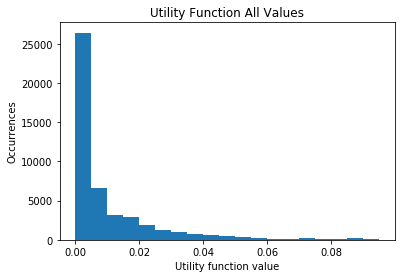

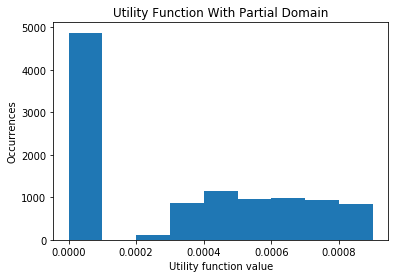

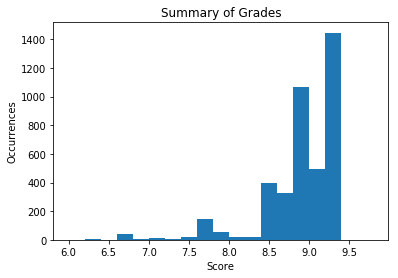

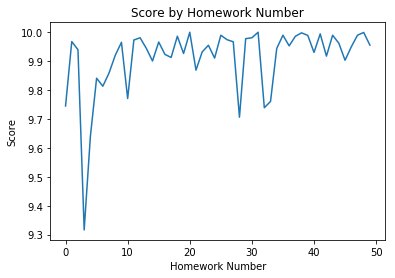

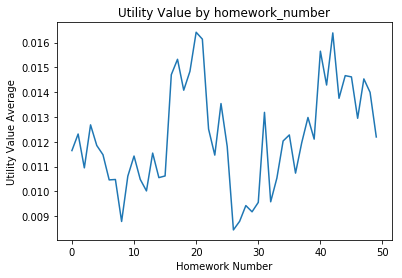

In [51]:
just_make_a_graph_data_maker_results()

<h1>Summary</h1>
<p>The first two graphs show the utility function does not properly guage student growth when problems with an appropriate difficulty are used. The utility function needs to also account for when students get a perfect store. The graph of grades as a function of homework number shows the students do improve their scores and reduce the variation of their scores as additional homework sets are given.</p>